
# Investigating No-show appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#dv">Data Visualisations</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset describes the trends of over 100k medical appointsments in Brazil. The main question of interest is whether or not the patients turn up on the day of their appointment. In view of this several other independent features have been enlisted like scholarship,gender,age etc.


In [1]:
# Importing all the packages I intend to use

import pandas as pand
import numpy as np
import seaborn as seab
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Here the data is loaded into a CSV reader and consequently it is checked for any possible inconsistencies.

### General Properties

In [27]:
# Code to lode the dataset
my_reader = pand.read_csv('noshowappointments-kagglev2-may-2016.csv')



In [28]:
# For printing the basic structure of the loaded dataset i.e dimensions
my_reader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [4]:
# For printing five rows of the loaded dataset
my_reader.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**By observing the data type of various columns it can be deduced that since no columns contain invalid data types,there is no concern regarding invalid data.**

### Rectifying typos and inappropriate data types

1. The PatientId mentioned has a float data type.
    * It must be an integer type.
2. The column named Hipertension has a typo error.
    * It must be renamed to Hypertension.
3. The column named Handcap has a type error.
    * It must be renamed to Handicap.
4. The columns ScheduledDay,AppointmentDay have a type object
    * Being a date it must have data type.



In [5]:
# Requisite codes to perform the above corrections

# for Error 1
my_reader['PatientId'] = my_reader['PatientId'].astype('int64')

# for Error 2
my_reader = my_reader.rename(columns={'Hipertension':'Hypertension'})

# for Error 3
my_reader = my_reader.rename(columns={'Handcap':'Handicap'})

# for Error 4
my_reader.ScheduledDay = my_reader.ScheduledDay.apply(np.datetime64)
my_reader.AppointmentDay = my_reader.AppointmentDay.apply(np.datetime64)

In [6]:
# Checking data-info after making corrections

my_reader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 10.5+ MB


*As a final check the unique values across all the columns are now inspected.*

In [7]:
my_reader['Gender'].unique()

array(['F', 'M'], dtype=object)

*No issues with Gender column*

In [8]:
my_reader['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1], dtype=int64)

*It is to be noted that age <=0 is impossible. At the same time age >100 might be a potential outlier. Hence we need to eliminate these two possibilities from the dataset.*

In [9]:
# Making corrections
my_reader = my_reader[(my_reader.Age >0) & (my_reader.Age <=100)]

In [10]:
# Observing ages after correction
my_reader['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   3,   1,  69,  68,  60,  67,  36,  10,  35,
        20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,  24,
        66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,  14,
         9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,  86,
        91,  98,  92,  96,  93,  95,  97, 100,  99], dtype=int64)

In [11]:
my_reader['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM',
       'JARDIM CAMBURI', 'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO',
       'RESISTÊNCIA', 'ILHA DE SANTA MARIA', 'JUCUTUQUARA',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'SÃO BENEDITO', 'PRAIA DO CANTO', 'BOA VISTA', 'SANTA LÚCIA',
       'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO JOÃO', 'FONTE GRANDE',
       'MORADA DE CAMBURI', 'ENSEADA DO SUÁ', 'SANTOS R

*No issues with Neighbourhood column*

In [12]:
my_reader['Scholarship'].unique()

array([0, 1], dtype=int64)

*No issues with Scholarship column*

In [13]:
my_reader['Hypertension'].unique()

array([1, 0], dtype=int64)

*No issues with Hypertension column*

In [14]:
my_reader['Diabetes'].unique()

array([0, 1], dtype=int64)

*No issues with Diabetes column*

In [15]:
my_reader['Alcoholism'].unique()

array([0, 1], dtype=int64)

*No issues with Alcoholism column*

In [16]:
my_reader['Handicap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

*No issues with Handicap column*

In [17]:
my_reader['SMS_received'].unique()

array([0, 1], dtype=int64)

*No issues with SMS_received column*

In [18]:
my_reader['No-show'].unique()

array(['No', 'Yes'], dtype=object)

*No issues with No-show column*

In [19]:
my_reader['PatientId'].unique()

array([29872499824296, 558997776694438, 4262962299951, ..., 72633149253362,
       996997666245785, 15576631729893], dtype=int64)

*No issues with PatientId column*

In [20]:
my_reader['AppointmentID'].unique()

array([5642903, 5642503, 5642549, ..., 5630692, 5630323, 5629448], dtype=int64)

*No issues with AppointmentID column*

In [21]:
my_reader['ScheduledDay'].unique()

array(['2016-04-29T18:38:08.000000000', '2016-04-29T16:08:27.000000000',
       '2016-04-29T16:19:04.000000000', ...,
       '2016-04-27T16:03:52.000000000', '2016-04-27T15:09:23.000000000',
       '2016-04-27T13:30:56.000000000'], dtype='datetime64[ns]')

*No issues with ScheduledDay column*

In [25]:
my_reader['AppointmentDay'].unique()

array(['2016-04-29T00:00:00.000000000', '2016-05-03T00:00:00.000000000',
       '2016-05-10T00:00:00.000000000', '2016-05-17T00:00:00.000000000',
       '2016-05-24T00:00:00.000000000', '2016-05-31T00:00:00.000000000',
       '2016-05-02T00:00:00.000000000', '2016-05-30T00:00:00.000000000',
       '2016-05-16T00:00:00.000000000', '2016-05-04T00:00:00.000000000',
       '2016-05-19T00:00:00.000000000', '2016-05-12T00:00:00.000000000',
       '2016-05-06T00:00:00.000000000', '2016-05-20T00:00:00.000000000',
       '2016-05-05T00:00:00.000000000', '2016-05-13T00:00:00.000000000',
       '2016-05-09T00:00:00.000000000', '2016-05-25T00:00:00.000000000',
       '2016-05-11T00:00:00.000000000', '2016-05-18T00:00:00.000000000',
       '2016-05-14T00:00:00.000000000', '2016-06-02T00:00:00.000000000',
       '2016-06-03T00:00:00.000000000', '2016-06-06T00:00:00.000000000',
       '2016-06-07T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-06-08T00:00:00.000000000'], dtype='dat

Now since the time is 00:00:00 in every row , we remove the time part.

In [26]:
# Code for making the required changes
my_reader.ScheduledDay = my_reader.ScheduledDay.apply(np.datetime64)
my_reader.AppointmentDay = my_reader.AppointmentDay.apply(np.datetime64)

In [28]:
# Viewing after making changes
my_reader.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='dv'></a>
## Data Visualisations

In this section we will visualise the dependent parameter i.e No-Show attribute against age and gender

### 1. No-Show attribute versus gender

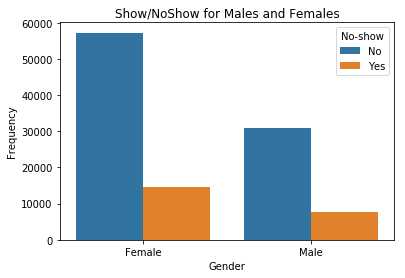

In [48]:
# Required code
my_ax = seab.countplot(x=my_reader.Gender, hue=my_reader['No-show'], data=my_reader)
my_ax.set_title("Show/NoShow for Males and Females")
x_ticks_labels=['Female', 'Male']
my_ax.set_xticklabels(x_ticks_labels)
plt.ylabel('Frequency')
plt.show()

*The graph clearly shows that No-show is less common both among males and females.*

### 2. No-Show attribute versus age

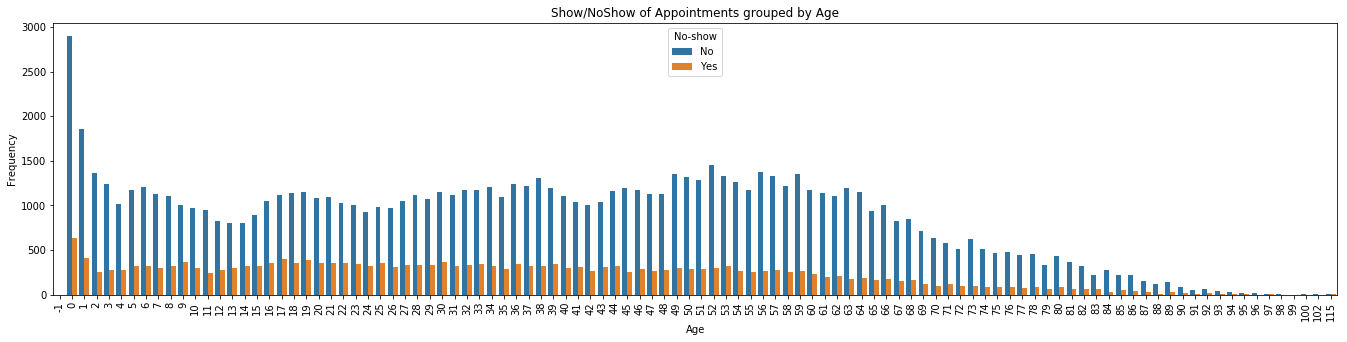

In [47]:
# Required code
plt.figure(figsize=(23,5)) # As the graph is very wide , the size is increased
my_ax = seab.countplot(x=my_reader.Age, hue=my_reader['No-show'])
my_ax.set_title("Show/NoShow of Appointments grouped by Age")
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()


*It is the clear from the graph that patients mostly come for the appointments across all the age groups.*

<a id='eda'></a>
## Exploratory Data Analysis
Clearly there is only one dependent variable : No-show attribute

Rest all attributes i.e Gender,Age,Scholarship,Neighbourhood but not limited to are independent variables.

### Posed Question 1 : How does gender affects No-Showing attribute?

In [65]:
# Helper function for creating data corresponding to male and females
def type_dat(type):
    '''
    This function frames required data to plot a bar graph for No-showing frequency for males and females
    '''
    my_list=[]
    ref = my_reader[type].unique()
    for i in ref:
        row = {'Constraint' :type}
        total_outcomes = len(my_reader[my_reader[type]== i])    # If current item i matches the required type
        favourable_outcomes = len(my_reader[(my_reader[type]== i) & (my_reader['No-show']=='No')])  # If current item i matches the required type and No-show attribute is No 
        #favourable_outcomes = 2
        prob = favourable_outcomes/total_outcomes
        row.update({'Category': i, 'Chances': prob})  # Adding obtained result category wise
        my_list.append(row)
    return pand.DataFrame(my_list)     # Use of pandas DataFrame module 


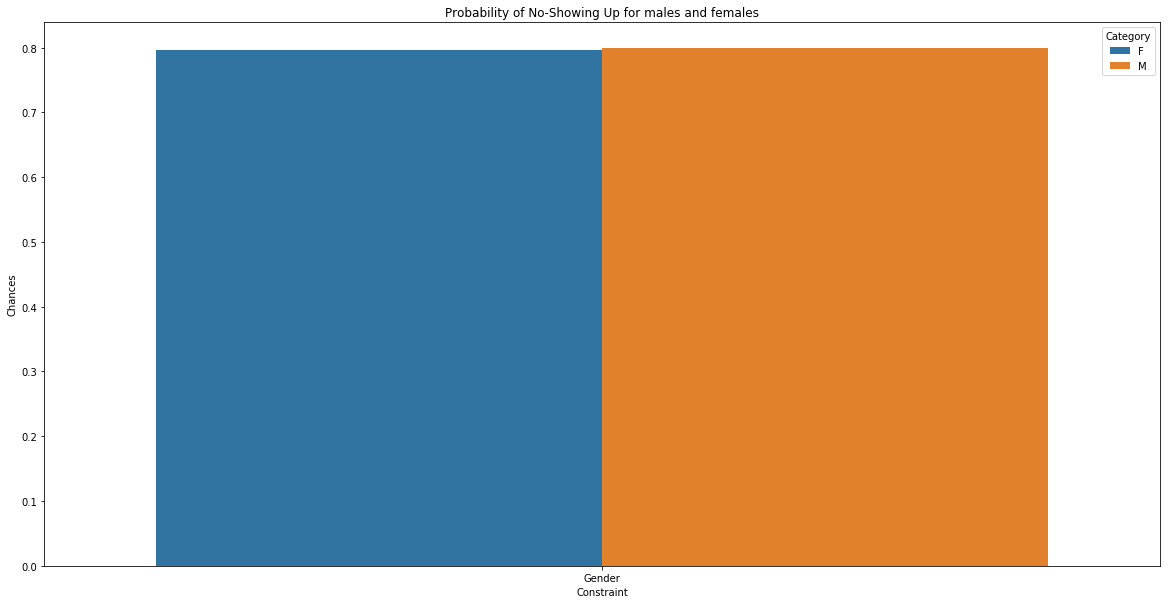

In [66]:
# Plotting the bar-graph
plt.figure(figsize=(20,10))
seab.barplot(data = type_dat('Gender'), x='Constraint', y='Chances', hue='Category')
plt.title('Probability of No-Showing Up for males and females')
plt.show()

*From the above plot it can be concluded that gender rarely has any effect on the No-showing up attribute of the patients.*

### Posed Question 2 : How does  Hypertension affects No-Showing attribute?

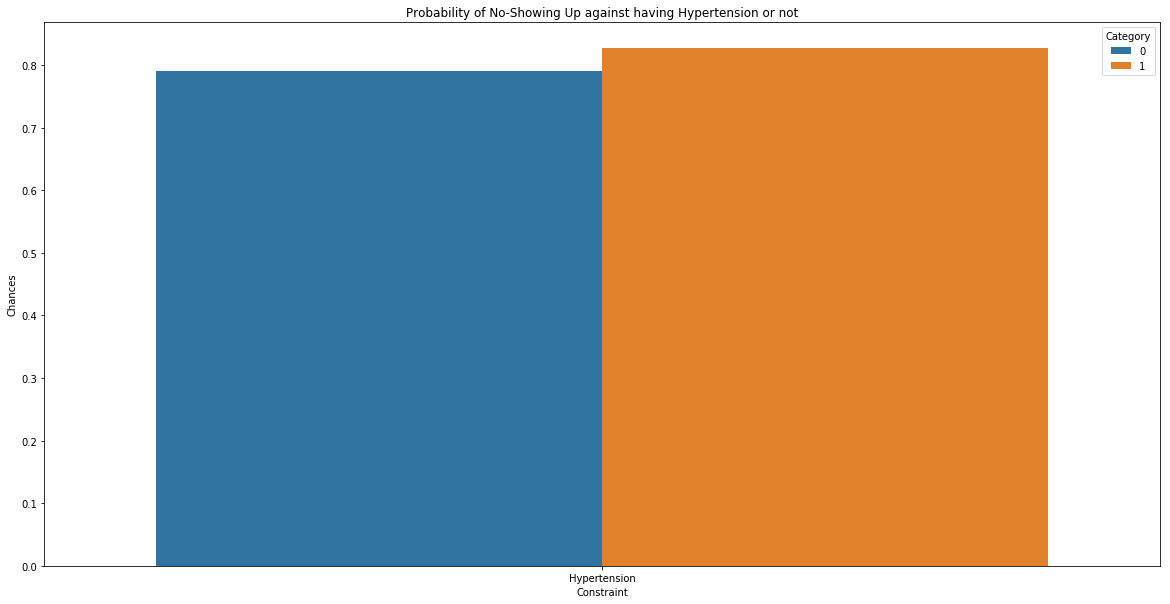

In [69]:
# For obtaining the required visualization we will again use the function written named type_dat. This time we will pass the
# Hypertension attribute to the function
plt.figure(figsize=(20,10))
seab.barplot(data = type_dat('Hypertension'), x='Constraint', y='Chances', hue='Category')
plt.title('Probability of No-Showing Up against having Hypertension or not')
plt.show()


*From the above plot it can be concluded that hypertension rarely has any effect on the No-showing up attribute of the patients.*

<a id='conclusions'></a>
## Conclusions

From the above visualisations it is evident that Hypertension and Gender had very less effect on No-Show attribute of the patients. However it is also possible that other factors which have not been considered might have influenced the results.
Such factors may be the Schedule of the patients or may be their distance from the place of appointment.
At the same time it is also possible that age or some other factor might have affected the results heavily.
Concluding that *Causation does not imply correlation* .



**References** :
1. http://ipython.readthedocs.io/en/stable/interactive/magics.html
2. http://pythonforengineers.com/introduction-to-pandas/
3. https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
4. https://pandas.pydata.org/pandas-docs/stable/categorical.html
5. https://elitedatascience.com/category/tutorials
6. https://seaborn.pydata.org/generated/seaborn.barplot.html

*Created by Monsij*

*Shaped by jupyter*